# Text Classification with Keras

---

# 1. Load data

In [2]:
%cd D:\Pum_Program\HDS_WORK\Year 3\Semester 1\Text analytics\Lecture7_lab

D:\Pum_Program\HDS_WORK\Year 3\Semester 1\Text analytics\Lecture7_lab


In [3]:
%pwd

'D:\\Pum_Program\\HDS_WORK\\Year 3\\Semester 1\\Text analytics\\Lecture7_lab'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle('consumer_complaint_dataset.data', compression='gzip')

In [6]:
df.head()

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


In [7]:
df['length'] = df['input'].str.len()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,492255.0,1079.263477,1222.237793,5.0,384.0,726.0,1340.0,32317.0


In [7]:
pd.crosstab(df.topic, columns='Count')\
  .sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",145090
Debt collection,106946
Mortgage,61581
Credit card or prepaid card,32144
Credit reporting,31588
Student loan,25083
Checking or savings account,19153
Credit card,18838
Bank account or service,14885


# 2. Label grouping / cleaning

- Group "Credit reporting" into "Credit reporting, credit repair services, or other personal consumer reports".
- Group "Credit card"/"Prepaid card" into "Credit card or prepaid card".
- Group "Payday loan" into "Payday loan, title loan, or personal loan".
- Group "Virtual currency"/"Money transfers" into "Money transfer, virtual currency, or money service".
- Remove "Other financial service"

In [8]:
df.loc[df['topic'] == 'Credit reporting', 'topic'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['topic'] == 'Credit card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic'] == 'Prepaid card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic'] == 'Payday loan', 'topic'] = 'Payday loan, title loan, or personal loan'
df.loc[df['topic'] == 'Virtual currency', 'topic'] = 'Money transfer, virtual currency, or money service'
df.loc[df['topic'] == 'Money transfers', 'topic'] = 'Money transfer, virtual currency, or money service'
df = df[df['topic'] != 'Other financial service']

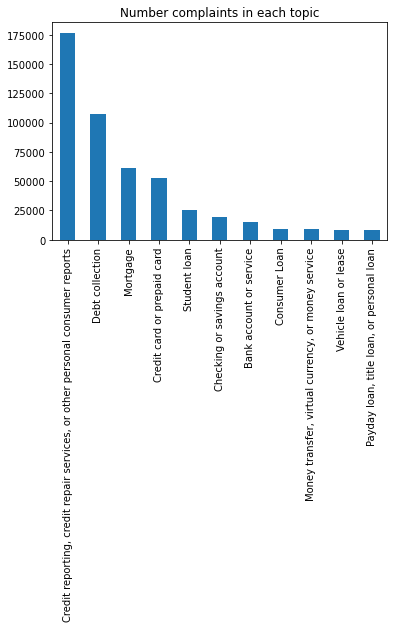

In [9]:
df['topic']\
  .value_counts()\
  .sort_values(ascending=False)\
  .plot(kind='bar',
        title='Number complaints in each topic')
plt.show()

# 3. Clean text

In [10]:
def print_plot(index):
    example = df[df.index == index][['input', 'topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Topic:', example[1])
        
print_plot(10)

XXXX is reporting incorrectly to Equifax and XXXX an account balance of {$2300.00} on the XXXX partial account number XXXX. ( Please see pages 12 and 13 of the attached credit report ). This account is over 7 years old and therefore should not be on my credit report. This incorrect reporting is harming my credit score and is a Fair Credit Reporting Act ( F.C.R.A. ) violation.
Topic: Credit reporting, credit repair services, or other personal consumer reports


In [11]:
print_plot(50)

I worked for XXXX from XX/XX/XXXX to XX/XX/XXXX. XXXX directly paid XXXX for my internet service at my resident. I never received any billing statement from XXXX. Everything was handled directly between XXXX and XXXX. 
I moved and ended my employment with XXXX on XX/XX/XXXX. I received a letter from XXXX XXXX dated XX/XX/XXXX to my new address attempting to collect {$120.00} for XXXX. I called XXXX on XX/XX/XXXX to resolve issue and they confirmed the account was XXXX corporate account. I also called XXXX XXXX to dispute my collection account. I finally received a letter from XXXX XXXX dated XX/XX/XXXX that they had reviewed account and resolved it. The letter stated " Our office has reviewed the above-referenced account and we have made the decision to discontinue our collection efforts. Rest assured that no information regarding this account has been reported to the credit bureaus by this agency. '' I thought this issue was resolved and closed. 

However, recently, I checked my credi

## Steps:
1. Convert all text to lower case.
2. Replace REPLACE_BY_SPACE_RE symbols by space in text.
3. Remove symbols that are in BAD_SYMBOLS_RE from text.
4. Remove “x” in text.
5. Remove stop words.
6. Remove digits in text.

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\66885\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['input'] = df['input'].apply(clean_text)

# Remove groups of numerical sequences with whitespace
df['input'] = df['input'].str.replace('\d+', '')

<ipython-input-14-89ef6f99f93e>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['input'] = df['input'].str.replace('\d+', '')


In [15]:
print_plot(10)

reporting incorrectly equifa account balance  partial account number please see pages   attached credit report account  years old therefore credit report incorrect reporting harming credit score fair credit reporting act fcra violation
Topic: Credit reporting, credit repair services, or other personal consumer reports


In [16]:
print_plot(50)

worked directly paid internet service resident never received billing statement everything handled directly moved ended employment received letter dated new address attempting collect  called resolve issue confirmed account corporate account also called dispute collection account finally received letter dated reviewed account resolved letter stated office reviewed abovereferenced account made decision discontinue collection efforts rest assured information regarding account reported credit bureaus agency thought issue resolved closed however recently checked credit reports noticed collection account file damaged credit score credit history disputed  credit agencies resolve issue requested  times    send dispute result writing still havent received mail sent investigation results letter stated collection account # never receive letter notification first time aware collection account creditor credit file many collection agencies attempting collect account dispute never receive mail notif

# 4. Modeling

1. Vectorize consumer complaints input text, by turning each text into either a sequence of integers or into a vector.
2. Limit the data set to the top 50000 words.
3. Set the max number of words in each complaint at 250.

### 4.1 Train the tokenizer

In [1]:
#!pip install tensorflow --user

In [2]:
#!pip install keras

In [17]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)
tokenizer.fit_on_texts(df['input'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 166330 unique tokens.


### 4.2 Pad the text sequence

In [18]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['input'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (491963, 250)


In [19]:
df['input'].values[0]

'transworld systems inc trying collect debt mine owed inaccurate'

In [20]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## 4.3 Convert output label into numeric values

In [21]:
Y = pd.get_dummies(df['topic']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (491963, 11)


In [22]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## 4.4 Holdout

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.30, random_state = 42
)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(344374, 250) (344374, 11)
(147589, 250) (147589, 11)


## 4.5 Modeling with Keras

- The first layer is the embedded layer that uses 100 length vectors to represent each word.
- SpatialDropout1D drops random words from all input
- The next layer is the LSTM layer with 100 memory units.
- The output layer must create 13 output values, one for each class.
- Activation function is softmax for multi-class classification.
- Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

### Choose between
### 1) Load the model

In [24]:
import os
from keras.models import load_model
if os.path.exists('model_lstm.h5'):
    model = load_model('model_lstm.h5')

### 2) Train the new model

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             patience=3, 
                                             min_delta=0.0001)])


Epoch 1/5
4843/4843 [==============================] - 2145s 443ms/step - loss: 0.8885 - accuracy: 0.7175 - val_loss: 0.6526 - val_accuracy: 0.7861
Epoch 2/5
4843/4843 [==============================] - 2196s 453ms/step - loss: 0.5858 - accuracy: 0.8029 - val_loss: 0.5393 - val_accuracy: 0.8160
Epoch 3/5
4843/4843 [==============================] - 2236s 462ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.5153 - val_accuracy: 0.8230
Epoch 4/5
4843/4843 [==============================] - 2601s 537ms/step - loss: 0.4524 - accuracy: 0.8434 - val_loss: 0.4980 - val_accuracy: 0.8318
Epoch 5/5
4843/4843 [==============================] - 2615s 540ms/step - loss: 0.4060 - accuracy: 0.8610 - val_loss: 0.5043 - val_accuracy: 0.8321


In [26]:
from keras.models import load_model

model.save('model_lstm.h5')

# 5. Evaluation

In [27]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

4613/4613 [==============================] - 231s 50ms/step - loss: 0.5058 - accuracy: 0.8297
Test set
	Loss: 0.506
	Accuracy: 0.830


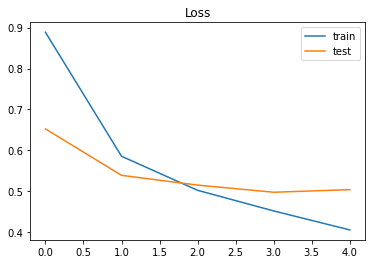

In [28]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

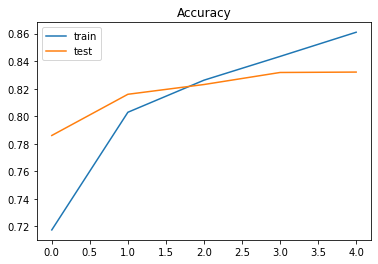

In [29]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)),
             index=labels, columns=labels)

,Bank account or service,Checking or savings account,Consumer Loan,Credit card or prepaid card,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Mortgage,"Payday loan, title loan, or personal loan",Student loan,Vehicle loan or lease
Bank account or service,1703,1643,29,429,151,123,168,164,29,7,9
Checking or savings account,784,4000,6,354,132,118,236,39,27,5,11
Consumer Loan,12,6,1014,131,463,366,4,101,412,21,352
Credit card or prepaid card,238,376,18,12757,1245,759,121,65,58,25,17
"Credit reporting, credit repair services, or other personal consumer reports",41,125,132,1142,47389,2973,18,493,121,358,171
Debt collection,44,89,140,593,2813,27153,44,436,299,403,104
"Money transfer, virtual currency, or money service",49,305,4,187,38,61,2061,31,22,14,6
Mortgage,30,67,13,101,574,340,11,17347,84,55,16
"Payday loan, title loan, or personal loan",20,38,74,134,170,370,18,92,1449,45,57
Student loan,9,2,11,43,397,354,5,41,66,6525,9


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46      4455
           1       0.60      0.70      0.65      5712
           2       0.52      0.35      0.42      2882
           3       0.80      0.81      0.81     15679
           4       0.88      0.89      0.89     52963
           5       0.83      0.85      0.84     32118
           6       0.77      0.74      0.75      2778
           7       0.92      0.93      0.93     18638
           8       0.54      0.59      0.56      2467
           9       0.87      0.87      0.87      7462
          10       0.58      0.43      0.50      2435

    accuracy                           0.83    147589
   macro avg       0.72      0.69      0.70    147589
weighted avg       0.83      0.83      0.83    147589



In [36]:
import numpy as np
pd.DataFrame({'Index':np.arange(0,11,1),'Class':labels})

,Index,Class
0,0,Bank account or service
1,1,Checking or savings account
2,2,Consumer Loan
3,3,Credit card or prepaid card
4,4,"Credit reporting, credit repair services, or o..."
5,5,Debt collection
6,6,"Money transfer, virtual currency, or money ser..."
7,7,Mortgage
8,8,"Payday loan, title loan, or personal loan"
9,9,Student loan


# 6. Test with new complaint

In [34]:
import numpy as np
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = pd.get_dummies(df['topic']).columns.values
print(pred, labels[np.argmax(pred)])

[[1.4598100e-03 8.8243774e-05 1.0472081e-03 6.0864016e-02 9.1706002e-03
  9.2713857e-01 5.4726792e-05 2.6461017e-05 7.1213872e-05 5.5882549e-05
  2.3271597e-05]] Debt collection


In [35]:
new_complaint = ['sold access event digitally screenshots detail transactions transferred money provided fake ticket reported paypal amount  including  fee paypal occured  paypal user gave two accounts']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = pd.get_dummies(df['topic']).columns.values
print(pred, labels[np.argmax(pred)])

[[4.5226485e-02 3.6985632e-02 5.2581221e-04 1.2845859e-01 4.0414776e-03
  1.3672149e-02 7.6818508e-01 6.1169863e-05 2.3590226e-03 4.4885266e-04
  3.5717378e-05]] Money transfer, virtual currency, or money service


# 7. Bi-directional LSTM

In [31]:
import keras
import tensorflow as tf
print(tf.test.is_gpu_available(), tf.device('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False <tensorflow.python.eager.context._EagerDeviceContext object at 0x00000158E27BE1C0>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             patience=3, 
                                             min_delta=0.0001)])
